In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\python310\lib\site-packages (0.2.12)




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256
2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
# df = pd.DataFrame(index=range(0,2000,1))
# df = df.iloc[1100:]

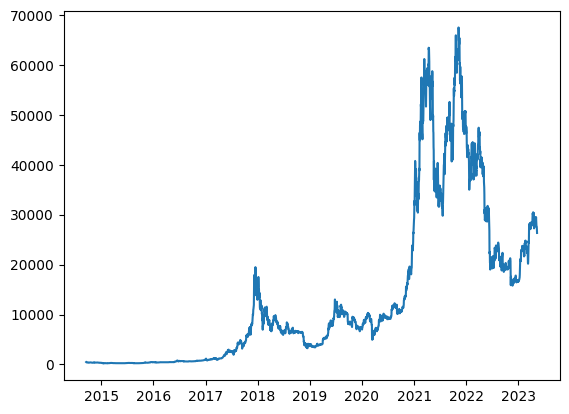

In [7]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [8]:
#splitting into train and test
to_row = int(len(df)*0.8)
train_data = list(df[0:to_row]['Adj Close'])
test_data = list(df[to_row:]['Adj Close'])
#train_data
# test_data

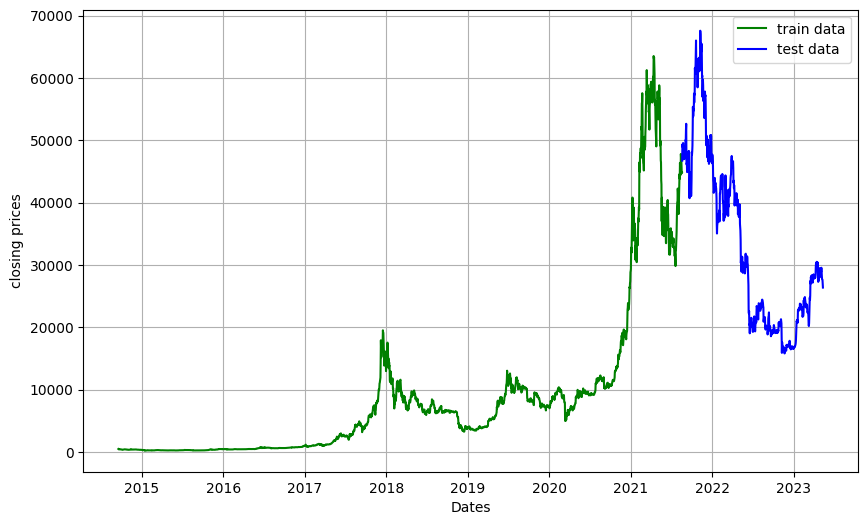

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('closing prices')
plt.plot(df[0:to_row]['Adj Close'],'green', label = 'train data')
plt.plot(df[to_row:]['Adj Close'],'blue', label = 'test data')
plt.legend()

In [10]:
model_predictions = []
n_test_observations = len(test_data)

In [11]:
print(n_test_observations)

632


In [12]:
from statsmodels.tsa.arima.model import ARIMA
for i in range(n_test_observations):
  model = ARIMA(train_data, order = (4, 1, 1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  actual_test_val = test_data[i]
  train_data.append(actual_test_val)

In [13]:
print(len(test_data))
print(len(model_predictions))
print(len(train_data))

632
632
3160


In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3159
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -25546.327
Date:                Fri, 12 May 2023   AIC                          51104.654
Time:                        21:07:44   BIC                          51141.000
Sample:                             0   HQIC                         51117.693
                               - 3159                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2995      0.218      1.376      0.169      -0.127       0.726
ar.L2          0.0152      0.010      1.471      0.141      -0.005       0.036
ar.L3          0.0180      0.011      1.686      0.092      -0.003       0.039
ar.L4          0.0261      0.011      2.472      0.013       0.005       0.047
ma.L1         -0.3242      0.218     -1.484      0.138      -0.752       0.104
sigma2      6.232e+05   5200.003    119.855      0.000    6.13e+05    6.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             37114.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            1010.04   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

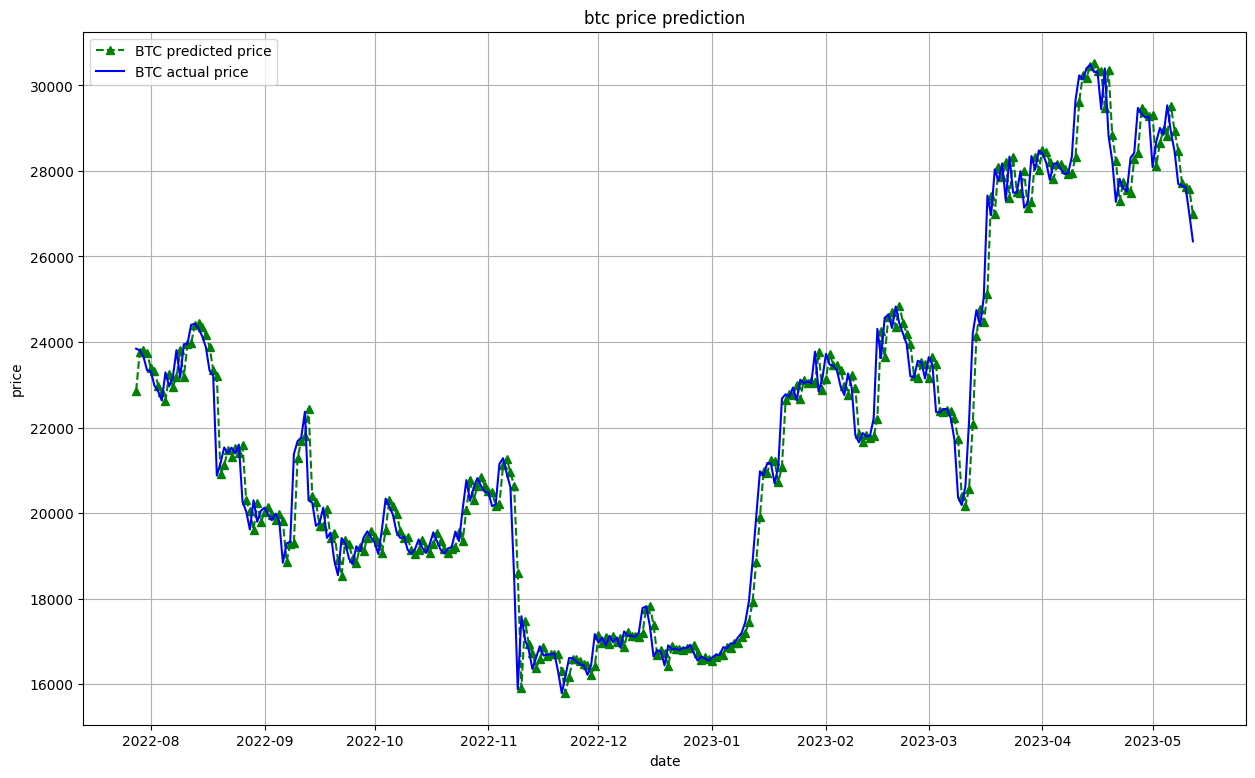

In [15]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df.tail(289).index

plt.plot(date_range, model_predictions[-289:], color = 'green', marker='^', linestyle = 'dashed', label = 'BTC predicted price')
plt.plot(date_range, test_data[-289:], color = 'blue', label = 'BTC actual price')

plt.title('btc price prediction')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error

mape = np.mean(np.abs(np.array(model_predictions[-289:]) - np.array(test_data[-289:])) / np.abs(test_data[-289:]))
r2 = r2_score(model_predictions, test_data)
mae = mean_absolute_error(model_predictions, test_data)




Mean Absolute Percentage Error (MAPE): 1.82%
R-squared (R2) Score: 0.99
Mean Absolute Error (MAE): 771.45


In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Convert lists to NumPy arrays
model_predictions = np.array(model_predictions)
test_data = np.array(test_data)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(model_predictions, test_data)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((model_predictions - test_data) ** 2))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_data - model_predictions) / test_data)) * 100

# Print performance metrics
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("R-squared (R2) Score: {:.2f}".format(r2))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))


Mean Absolute Error (MAE): 771.45
Root Mean Squared Error (RMSE): 1181.38
Mean Absolute Percentage Error (MAPE): 2.27%
R-squared (R2) Score: 0.99
Mean Absolute Error (MAE): 771.45
